In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from netCDF4 import Dataset, num2date, date2num


In [17]:
from IPython.html.widgets import *
from IPython.html.widgets import interact, IntSlider, FloatSliderWidget

#from ipywidgets import StaticInteract, RangeWidget, RadioWidget

(0, 6.283185307179586)

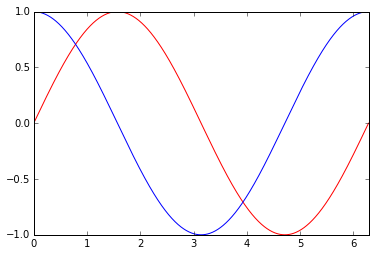

In [6]:

th = np.linspace(0, 2*np.pi, 1024)

fig, ax= plt.subplots()
ln_sin, = ax.plot(th, np.sin(th), 'r')
ln_cos, = ax.plot(th, np.cos(th))
ax.set_xlim(0, 2*np.pi)

In [8]:
from IPython.display import display

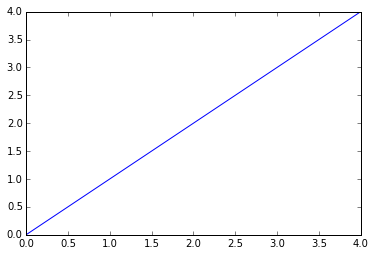

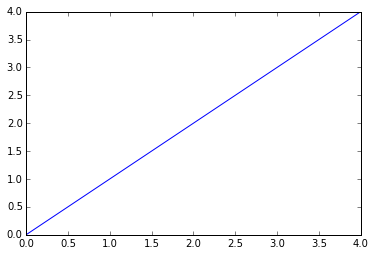

In [11]:
plt.plot(range(5))
display(plt.gcf())

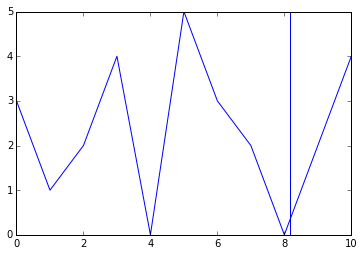

In [14]:
fig, ax = plt.subplots() 
ax.plot([3,1,2,4,0,5,3,2,0,2,4])

vline = ax.axvline(1)
hline = ax.axhline(0.5)

def set_cursor(x, y):
    vline.set_xdata((x, x))
    hline.set_ydata((y, y))
    display(fig)
    
interact(set_cursor, x=(1, 9, 0.01), y=(0, 5, 0.01))

In [19]:
def plot(amplitude, color):
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    x = np.linspace(0, 10, 1000)
    ax.plot(x, amplitude * np.sin(x), color=color,
            lw=5, alpha=0.4)
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.1, 1.1)
    return fig

#from ipywidgets import StaticInteract, RangeWidget, RadioWidget

#StaticInteract(plot,
#               amplitude=RangeWidget(0.1, 1.0, 0.1),
#               color=RadioWidget(['blue', 'green', 'red']))

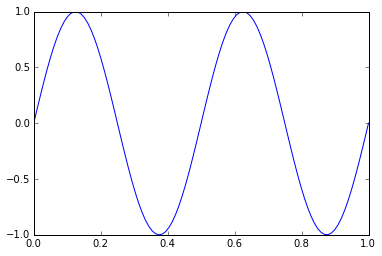

In [24]:
x = np.linspace(0,1,100)
f = 2

plt.plot(x, np.sin(2*np.pi*x*f))



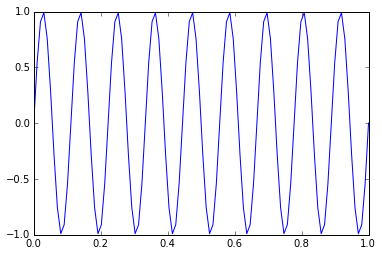

In [28]:
def pltsin(f):
    plt.plot(x, np.sin(2*np.pi*x*f))

    
pltsin(9)

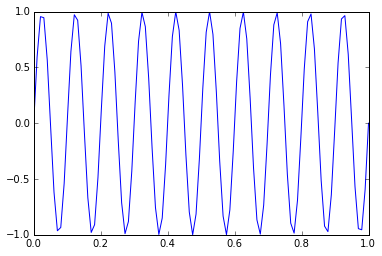

In [33]:
interact(pltsin, f=(1,10, 0.1))

In [34]:
variabs = ['air', 'uwnd', 'vwnd', 'rhum']
for vvv in variabs:
    for i in range(2000,2010):
        !wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/surface/{vvv}.sig995.{i}.nc

--2015-07-12 07:16:09--  ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/surface/air.sig995.2000.nc
           => 'air.sig995.2000.nc'
Resolving ftp.cdc.noaa.gov... 140.172.38.117
Connecting to ftp.cdc.noaa.gov|140.172.38.117|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Datasets/ncep.reanalysis.dailyavgs/surface ... done.
==> SIZE air.sig995.2000.nc ... 7470114
==> PASV ... done.    ==> RETR air.sig995.2000.nc ... done.
Length: 7470114 (7.1M) (unauthoritative)

air.sig995.2000.nc  100%[=====================>]   7.12M  2.16MB/s   in 3.7s   

2015-07-12 07:16:14 (1.91 MB/s) - 'air.sig995.2000.nc' saved [7470114]

--2015-07-12 07:16:14--  ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/surface/air.sig995.2001.nc
           => 'air.sig995.2001.nc'
Resolving ftp.cdc.noaa.gov... 140.172.38.117
Connecting to ftp.cdc.noaa.gov|140.172.38.117|:21... connected.
Logging in as anonymous ... Lo

In [35]:
f = Dataset('air.sig995.2000.nc')

In [36]:
air = f.variables['air']

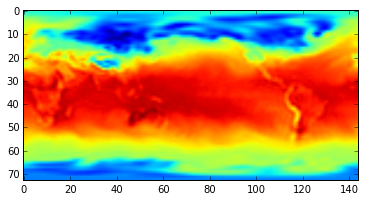

In [38]:
plt.imshow(air[0,:,:])

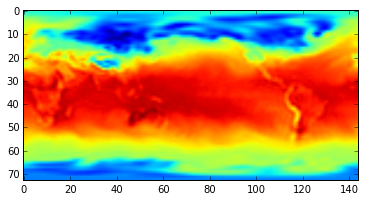

In [39]:
def sh(time):
    plt.imshow(air[time,:,:])
    
sh(0)

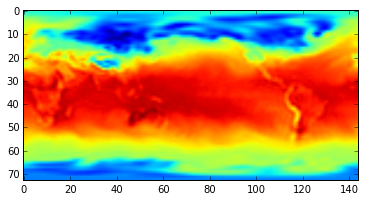

In [40]:
interact(sh, time=(0,355,1))

In [43]:
def sh(var='air', time=0):
    f = Dataset(var+'.sig995.2000.nc')
    vv = f.variables[var]
    plt.imshow(vv[time,:,:])

variabs = ['air', 'uwnd', 'vwnd', 'rhum']

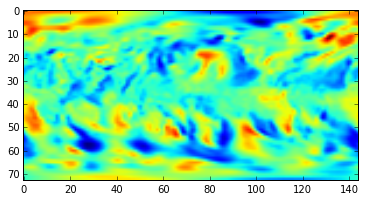

In [44]:
interact(sh, time=(0,355,1), var=variabs)

In [46]:
def sh(year='2000',var='air', time=0):
    f = Dataset(var+'.sig995.'+year+'.nc')
    vv = f.variables[var]
    plt.imshow(vv[time,:,:])
    
years = [str(x) for x in range(2000,2010)]

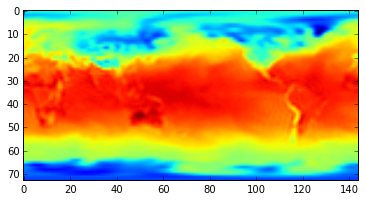

In [47]:
interact(sh, year=years, time=(0,355,1), var=variabs);